In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio.v2 as imageio
from IPython.display import Image, display

from classy import Class

from hmf.alternatives.wdm import MassFunctionWDM
from hmf import MassFunction
from matplotlib.pyplot import subplots, subplots_adjust, savefig
from halomod import HaloModel
from halomod import TracerHaloModel as HM

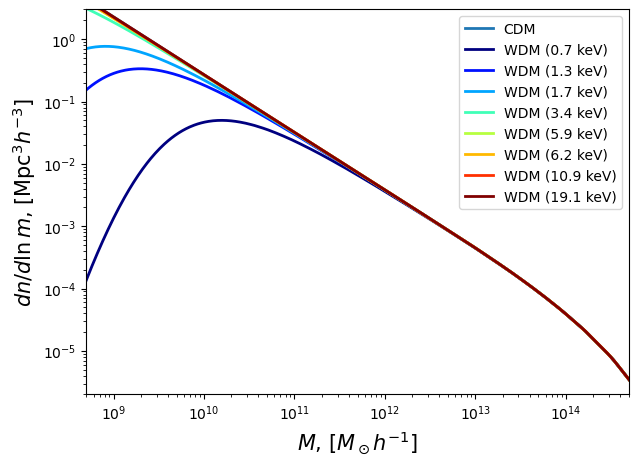

In [3]:
# Values of m_ncdm in keV
m_ncdm_keV_values = [0.7, 1.3, 1.7, 3.4, 5.9, 6.2, 10.9, 19.1]

# Create/update correct instances
cdm_mf_th = MassFunction(hmf_model="SMT",Mmin=6.0,z=0)#,fsig_params={"a":1}
cdm_mf = MassFunction(hmf_model="SMT",Mmin=6.0,z=0,hmf_params={"a":1},filter_model="SharpK",filter_params={"c":2.5})
wdm_mf_th = MassFunctionWDM(hmf_model="SMT",Mmin=6.0,z=0)#,fsig_params={"a":1}
wdm_mf = MassFunctionWDM(hmf_model="SMT",hmf_params={"a":1},Mmin=6.0,filter_model="SharpK",filter_params={"c":2.5})

# Generate only the halo mass function
fig, ax = plt.subplots(figsize=(7,5), subplot_kw=dict(xscale='log',xlim=(5e8,5e14),yscale="log"))
ax.plot(cdm_mf.m,cdm_mf.dndlnm,label="CDM",lw=2)

cols = plt.cm.jet(np.linspace(0,1,len(m_ncdm_keV_values)))  # Set color map

for j, mx in enumerate(m_ncdm_keV_values):
    wdm_mf.update(wdm_mass = mx)
    ax.plot(wdm_mf.m,wdm_mf.dndlnm,color=cols[j],label="WDM (%s keV)"%mx,lw=2)

ax.set_xlabel(r"$M$, $[M_\odot h^{-1}]$",fontsize=15)
ax.set_ylim((2e-6,3))
ax.set_ylabel(r"$dn/d \ln m$, [${\rm Mpc}^3h^{-3}$]",fontsize=15)
plt.subplots_adjust(hspace=0.05)
ax.legend(loc=0, fontsize=10)

plt.savefig("dndm_top.pdf")